# 2. Example using matplotlib and numpy

This part tries to show some more stuff that can be done when mixing Jupyter with other cool modules, like matplotlib, and numpy...

In [1]:
%pylab inline
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def image_load(filename, max_size=1200):
    """Load an image, downsampling if needed to keep within requested size."""
    
    img = plt.imread(filename)
    shape = np.array(img.shape, dtype=float)
    sample_fac = int(np.ceil((shape/max_size).max()))
    if sample_fac > 1:
        new_img = img[::sample_fac, ::sample_fac, ...]
        print ('Downsampling %sX:'% sample_fac, img.shape, '->', new_img.shape)
        return new_img
    else:
        return img

## 2.1. How can this be used?

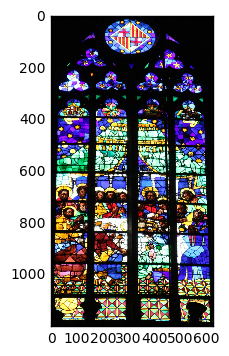

In [3]:
filename = 'stained_glass_barcelona.png'
img = image_load(filename)
plt.imshow(img);

Let's see the original file...

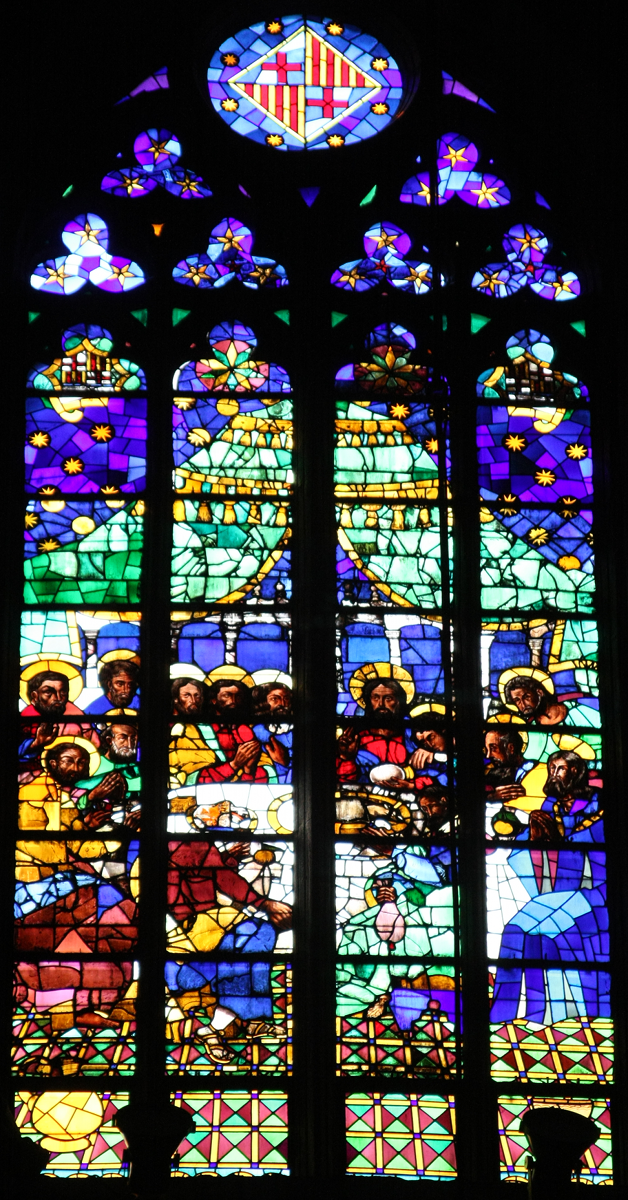

In [4]:
from IPython.core.display import Image
Image(filename=filename)

## 2.3. Combining graphs

Extract each color channel and create a figure with 4 subplots, one for each channel, so we can see its structure clearly. Display the full color figure and the color channels:

In [5]:
def extract_color_channels(img):
    red, green, blue = [ img[:,:,i] for i in range(3) ]

    f, axes = plt.subplots(1, 4, sharex=True, sharey=True)

    axes[0].imshow(img)
    axes[1].imshow(red, cmap=cm.Reds_r)
    axes[2].imshow(green, cmap=cm.Greens_r)
    axes[3].imshow(blue, cmap=cm.Blues_r)

    # Turn off tick labels
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')

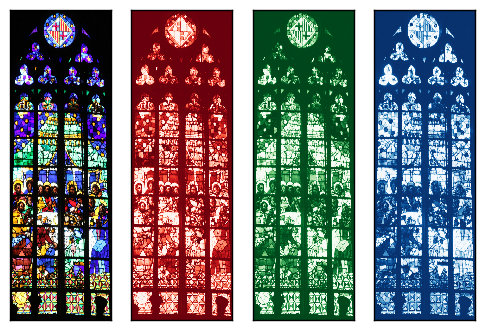

In [6]:
extract_color_channels(img)

## 2.4. Getting histograms

In [7]:
def get_histograms(img):
    red, green, blue = [ img[:,:,i] for i in range(3) ]
    lumi = img[:,:,:3].mean(axis=2)
    hrange = (0.0, 1.0) if lumi.max()<=1.0 else (0.0, 255.0)
    f, axes = plt.subplots(4, 1, sharex=True)

    axes[0].hist(lumi.flatten(), 256, range=hrange, facecolor='k', edgecolor='k')
    axes[1].hist(red.flatten(), 256, range=hrange, facecolor='r', edgecolor='r')
    axes[2].hist(green.flatten(), 256, range=hrange, facecolor='g', edgecolor='g')
    axes[3].hist(blue.flatten(), 256, range=hrange, facecolor='b', edgecolor='b');
    f.subplots_adjust(hspace=0);

    # We want the x tick labels to be invisible on all but the bottom figure
    for ax in axes[:-1]:
        for label in ax.get_xticklabels():
            label.set_visible(False)

    # Don't show the last y label in plots 2-4:
    for ax in axes[1:]:
        ax.get_yticklabels()[-1].set_visible(False)

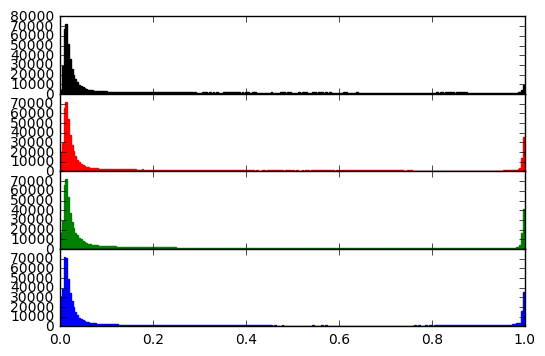

In [8]:
get_histograms(img)

## 2.5. Use these new functions on other data

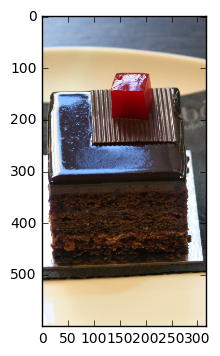

In [9]:
filename = 'dessert.png'
img = image_load(filename)
plt.imshow(img);

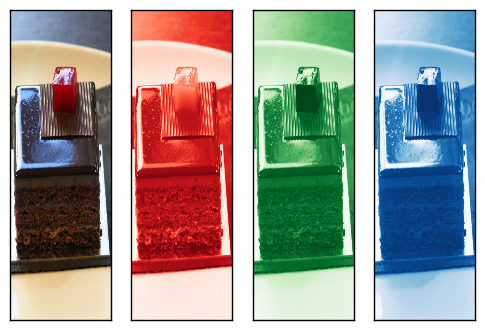

In [10]:
extract_color_channels(img)

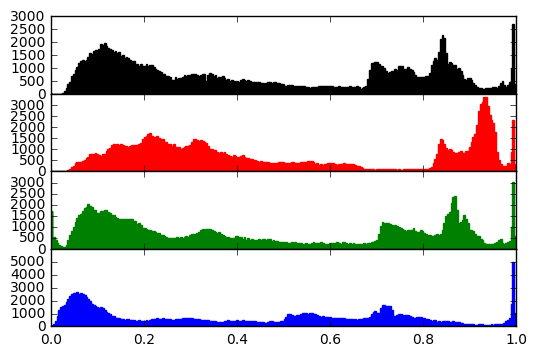

In [11]:
get_histograms(img)